In [ ]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/ML_HANDS_ON/preprocessing_dataset.csv')

In [ ]:
df.head(10)

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
5,Frank,35.0,NaN,61000.0,Finance
6,Grace,120.0,F,NaN,Finance
7,Henry,28.0,M,59000.0,HR
8,Ivy,29.0,F,63000.0,IT
9,Jack,27.0,M,62000.0,Finance


In [ ]:
#Chec Null Values
df.isna().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


In [ ]:
df.isnull().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
!pip install missingno

<Axes: >

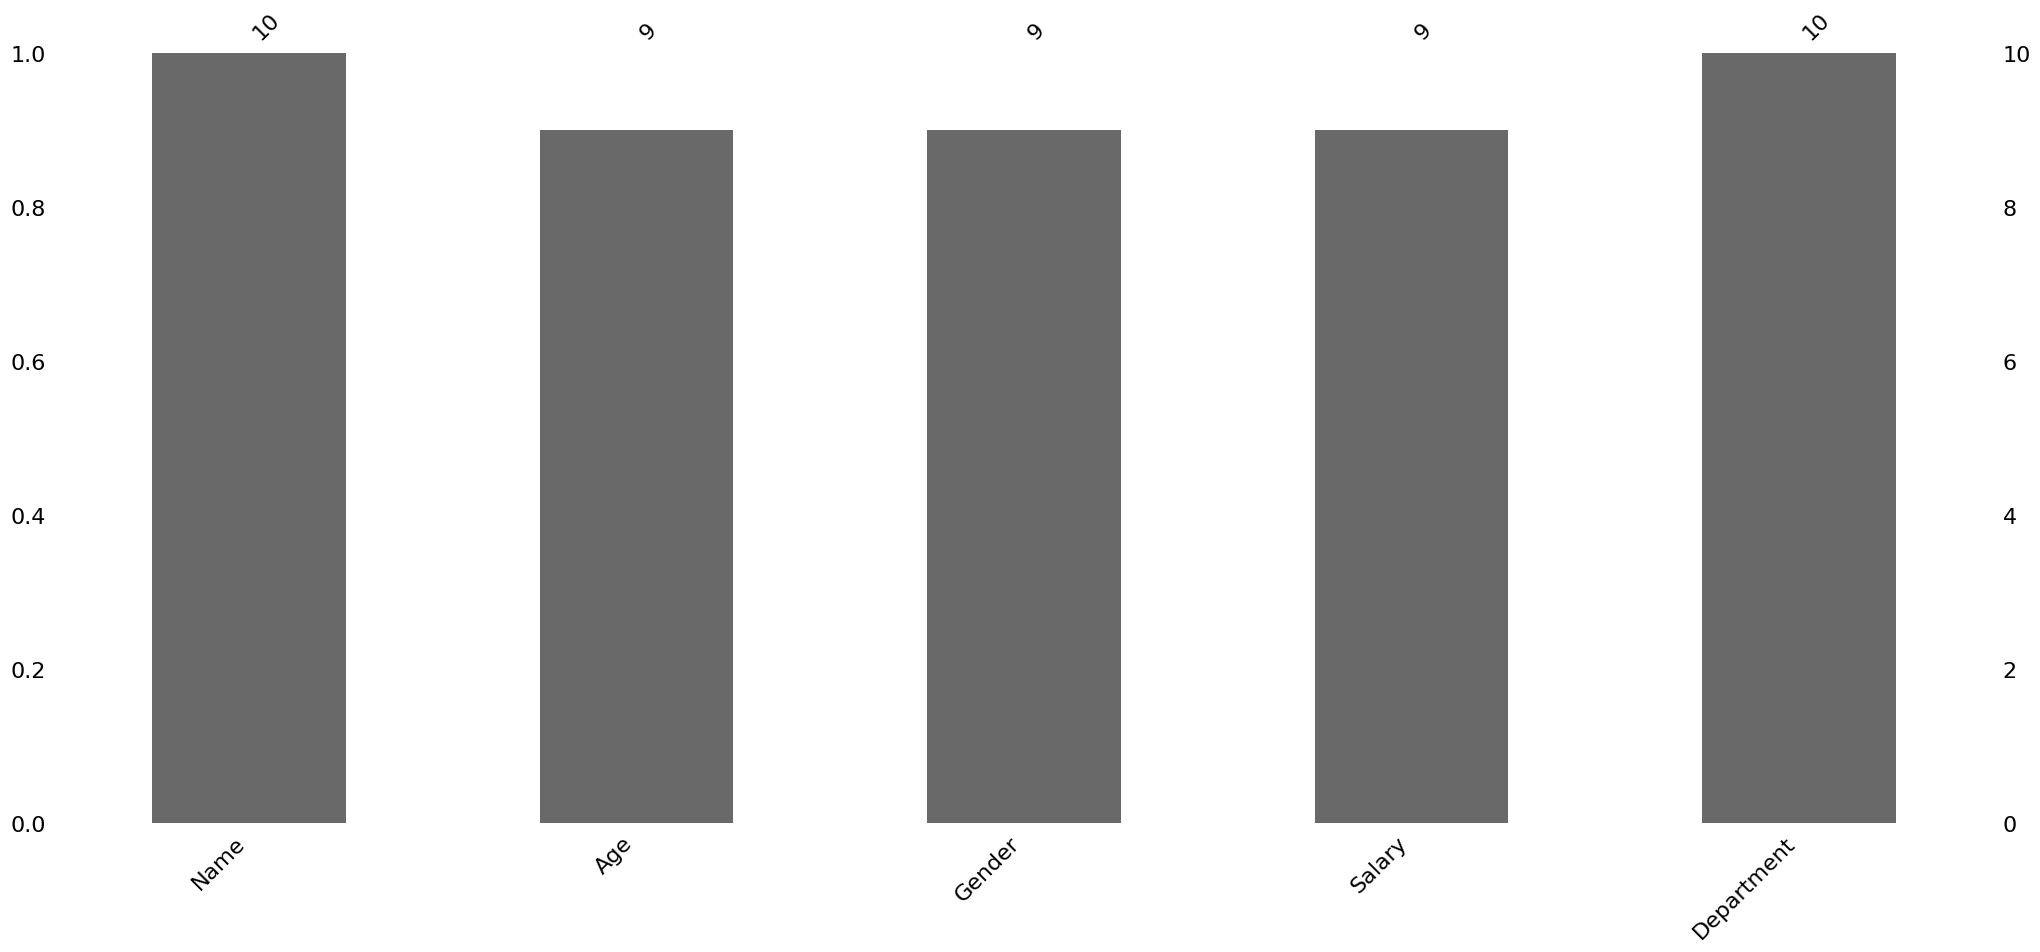

In [ ]:
#Check Missing Values
import missingno as msno
msno.bar(df)

<Axes: >

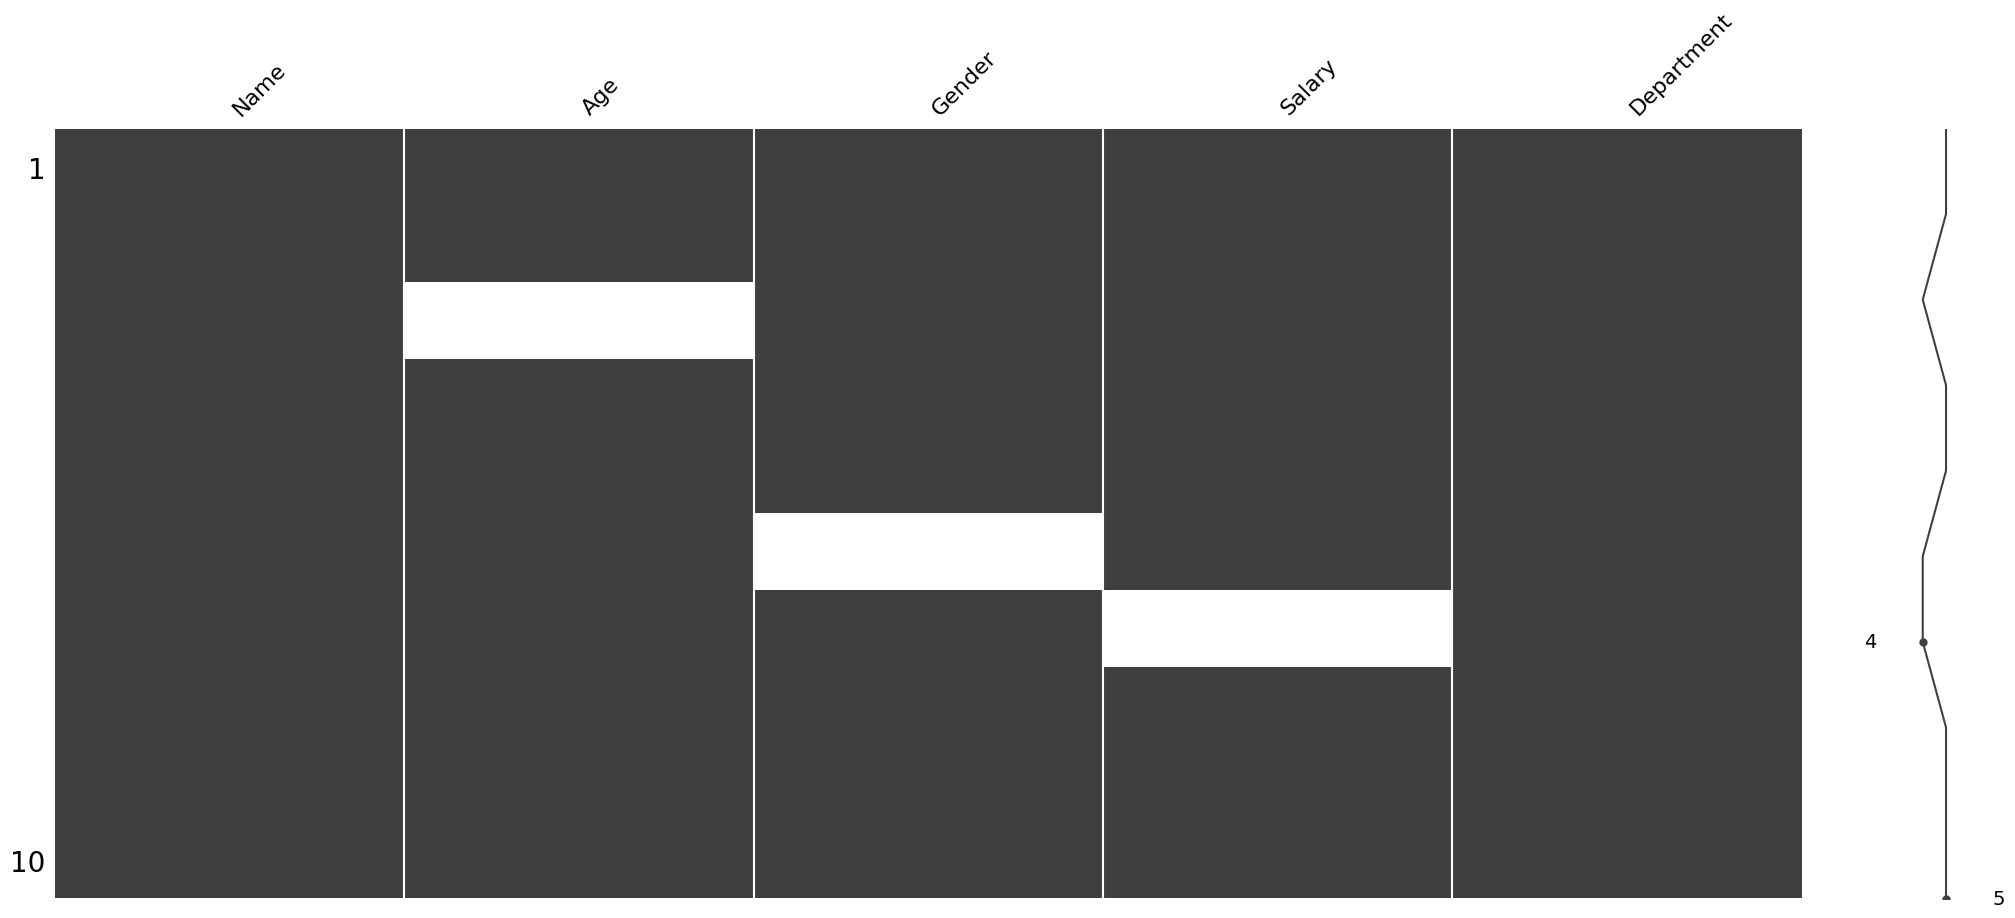

In [ ]:
msno.matrix(df)

<Axes: >

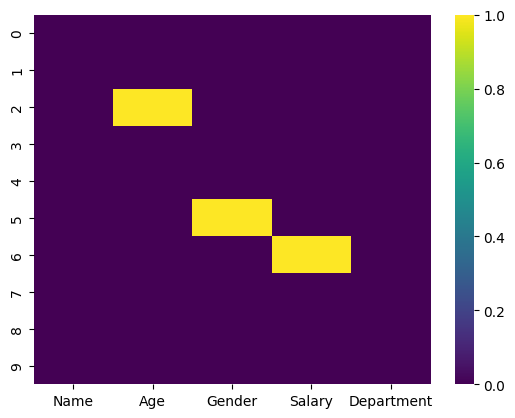

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cmap = 'viridis')

In [ ]:
#Remove Missing Values
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Salary,0
Department,0


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-28-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

/tmp/ipython-input-29-2644856927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Salary,0
Department,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Salary'] = imputer.fit_transform(df[['Salary']])

<Axes: ylabel='Age'>

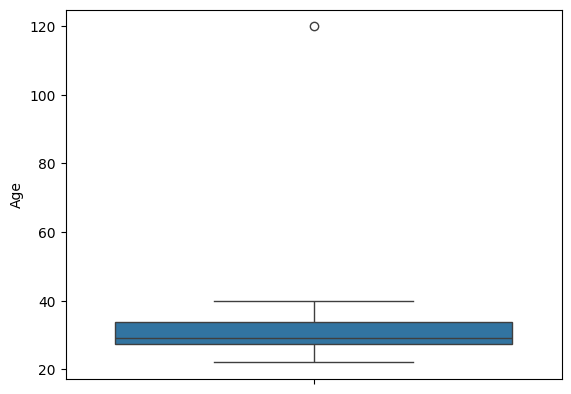

In [ ]:
import seaborn as sns
sns.boxplot(df['Age'])

In [ ]:
#Inter Quantile Range
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

In [ ]:
outlier = df[(df['Age'] < Lower_Bound) | (df['Age'] > Upper_Bound)]
print(outlier)

    Name    Age Gender        Salary Department
6  Grace  120.0      F  57777.777778    Finance


In [ ]:
from scipy.stats import zscore
z_score = zscore(df['Age'])
z_score

array([-0.48948719, -0.30819564, -0.34445395,  0.05438747, -0.59826213,
       -0.12690409,  2.95505232, -0.38071226, -0.34445395, -0.41697057])

In [ ]:
df[np.abs(z_score) > 2.5]

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
df['Outlier'] = iso.fit_predict(df[['Age']])

In [ ]:
df[df['Outlier'] == -1]

,Name,Age,Gender,Salary,Department,Outlier
3,David,40.0,M,58000.0,HR,-1


In [ ]:
df['Age'] = np.where(df['Age'] > 100, df['Age'].median(), df['Age'])

In [ ]:
df['Age']

,Age
0,25.0
1,30.0
3,40.0
4,22.0
7,28.0
8,29.0
9,27.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_encoder'] = le.fit_transform(df['Gender'])
df

,Name,Age,Gender,Salary,Outlier,Department_HR,Department_IT,Gender_encoder
0,Alice,25.0,F,50000.0,1,True,False,0
1,Bob,30.0,M,60000.0,1,False,False,1
3,David,40.0,M,58000.0,-1,True,False,1
4,Eve,22.0,F,52000.0,1,False,True,0
7,Henry,28.0,M,59000.0,1,True,False,1
8,Ivy,29.0,F,63000.0,1,False,True,0
9,Jack,27.0,M,62000.0,1,False,False,1


In [ ]:
df = pd.get_dummies(df, columns = ['Department'], drop_first = True)#drop_first can remove columns
df

,Name,Age,Gender,Salary,Outlier,Department_HR,Department_IT
0,Alice,25.0,F,50000.0,1,True,False
1,Bob,30.0,M,60000.0,1,False,False
3,David,40.0,M,58000.0,-1,True,False
4,Eve,22.0,F,52000.0,1,False,True
7,Henry,28.0,M,59000.0,1,True,False
8,Ivy,29.0,F,63000.0,1,False,True
9,Jack,27.0,M,62000.0,1,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse_output = False)#sparce_output used for store only 1 in memory 0 are not store in memory
df['Gender'] = oe.fit_transform(df[['Gender']])

df

,Name,Age,Gender,Salary,Outlier,Department_HR,Department_IT,Gender_encoder
0,Alice,25.0,1.0,50000.0,1,True,False,0
1,Bob,30.0,0.0,60000.0,1,False,False,1
3,David,40.0,0.0,58000.0,-1,True,False,1
4,Eve,22.0,1.0,52000.0,1,False,True,0
7,Henry,28.0,0.0,59000.0,1,True,False,1
8,Ivy,29.0,1.0,63000.0,1,False,True,0
9,Jack,27.0,0.0,62000.0,1,False,False,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['AGE_SCALER'] = scaler.fit_transform(df[['Age']])
df['SALARY_SCALER'] = scaler.fit_transform(df[['Salary']])
df

,Name,Age,Gender,Salary,Outlier,Department_HR,Department_IT,Gender_encoder,AGE_SCALER,SALARY_SCALER,AGE_SCALER_MIN,SALARY_SCALER_MIN
0,Alice,25.0,1.0,50000.0,1,True,False,0,-0.710266,-1.692466,0.166667,0.000000
1,Bob,30.0,0.0,60000.0,1,False,False,1,0.245861,0.501471,0.444444,0.769231
3,David,40.0,0.0,58000.0,-1,True,False,1,2.158116,0.062684,1.000000,0.615385
4,Eve,22.0,1.0,52000.0,1,False,True,0,-1.283942,-1.253678,0.000000,0.153846
7,Henry,28.0,0.0,59000.0,1,True,False,1,-0.136590,0.282078,0.333333,0.692308
8,Ivy,29.0,1.0,63000.0,1,False,True,0,0.054636,1.159652,0.388889,1.000000
9,Jack,27.0,0.0,62000.0,1,False,False,1,-0.327815,0.940259,0.277778,0.923077


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['AGE_SCALER_MIN'] = scaler.fit_transform(df[['Age']])
df['SALARY_SCALER_MIN'] = scaler.fit_transform(df[['Salary']])
df

,Name,Age,Gender,Salary,Outlier,Department_HR,Department_IT,Gender_encoder,AGE_SCALER,SALARY_SCALER,AGE_SCALER_MIN,SALARY_SCALER_MIN
0,Alice,25.0,1.0,50000.0,1,True,False,0,-0.710266,-1.692466,0.166667,0.000000
1,Bob,30.0,0.0,60000.0,1,False,False,1,0.245861,0.501471,0.444444,0.769231
3,David,40.0,0.0,58000.0,-1,True,False,1,2.158116,0.062684,1.000000,0.615385
4,Eve,22.0,1.0,52000.0,1,False,True,0,-1.283942,-1.253678,0.000000,0.153846
7,Henry,28.0,0.0,59000.0,1,True,False,1,-0.136590,0.282078,0.333333,0.692308
8,Ivy,29.0,1.0,63000.0,1,False,True,0,0.054636,1.159652,0.388889,1.000000
9,Jack,27.0,0.0,62000.0,1,False,False,1,-0.327815,0.940259,0.277778,0.923077
